# Sensors Project


## 1. Read the sensors data and parse the time columns

You can read data from a CSV file using the read_csv function or a JSON file using the read_json function. 


This dataset is a list of different sensors of temperature, humidity and pressure. This data is split in different files by its respective measure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
path = '../../data/raw/measures/'
h_dht_11 = pd.read_json(path + 'H-DHT11-measures.json',lines=True,convert_dates=['time'])
t_dht_11 = pd.read_csv(path + 'T-DHT11-measures.csv',parse_dates =["time"], index_col ="time")
h_dht_22 =pd.read_csv(path + 'H-DHT22-measures.csv',parse_dates =["time"], index_col ="time")
t_dht_22 = pd.read_csv(path + 'T-DHT22-measures.csv',parse_dates =["time"], index_col ="time")
h_htu_21= pd.read_csv(path + 'H-HTU21-measures.csv',parse_dates =["time"], index_col ="time")
t_htu_21 = pd.read_json(path + 'T-HTU21-measures.json',lines=True,convert_dates=['time'])
p_bmp_280=pd.read_csv(path + 'P-BMP280-measures.csv',parse_dates =["time"], index_col ="time")
t_bmp_280=pd.read_csv(path + 'T-BMP280-measures.csv',parse_dates =["time"], index_col ="time")
p_dm_280=pd.read_json(path + 'P-DM280-measures.json',lines=True,convert_dates=['time'])
t_dm_280=pd.read_json(path + 'T-DM280-measures.json',lines=True,convert_dates=['time'])
print(h_dht_11)
print(t_dht_11)
print(h_dht_22)
print(t_dht_22)
print(h_htu_21)
print(t_htu_21)
print(p_bmp_280)
print(t_bmp_280)
print(p_dm_280)
print(t_dm_280)

          sensor  value                      time
0        H-DHT11     31 2017-12-22 11:22:11+00:00
1        H-DHT11     31 2017-12-22 11:22:16+00:00
2        H-DHT11     31 2017-12-22 11:22:20+00:00
3        H-DHT11     31 2017-12-22 11:22:24+00:00
4        H-DHT11     31 2017-12-22 11:22:28+00:00
...          ...    ...                       ...
1420297  H-DHT11     33 2018-03-13 11:41:53+00:00
1420298  H-DHT11     33 2018-03-13 11:41:57+00:00
1420299  H-DHT11     33 2018-03-13 11:42:01+00:00
1420300  H-DHT11     33 2018-03-13 11:42:05+00:00
1420301  H-DHT11     33 2018-03-13 11:42:09+00:00

[1420302 rows x 3 columns]
                            sensor  value
time                                     
2017-12-22 11:22:11+00:00  T-DHT11     27
2017-12-22 11:22:16+00:00  T-DHT11     28
2017-12-22 11:22:20+00:00  T-DHT11     28
2017-12-22 11:22:24+00:00  T-DHT11     28
2017-12-22 11:22:28+00:00  T-DHT11     28
...                            ...    ...
2018-03-13 11:41:53+00:00  T-DHT11  

## 2. Clean and prepare the data

The objective is to clean and prepare the data to get the different sensors measurements (temperature,humidity,pressure) and perform a mean in order to show the data from these different sensors (DHT11,DHT22,HTU21,BMP280,DM280) by weeks.

The steps I followed was:

* Rename the value column to the measure it is representing ( temperature or humidity or pressure )
* Convert the time column in the index of the dataframe
* Make the mean by week
* Set the column sensor with the value of the sensor name without the symbol of the measure


### 2.1 Rename the value column to the measure it is representing

In [19]:
new_names={'value':'humidity'}
h_dht_11.rename(columns=new_names, inplace=True)
new_names={'value':'temperature'}
t_dht_11.rename(columns=new_names, inplace=True)
new_names={'value':'humidity'}
h_dht_22.rename(columns=new_names, inplace=True)
new_names={'value':'temperature'}
t_dht_22.rename(columns=new_names, inplace=True)
new_names={'value':'humidity'}
h_htu_21.rename(columns=new_names, inplace=True)
new_names={'value':'temperature'}
t_htu_21.rename(columns=new_names, inplace=True)
new_names={'value':'hPa'}
p_bmp_280.rename(columns=new_names, inplace=True)
new_names={'value':'temperature'}
t_bmp_280.rename(columns=new_names, inplace=True)
new_names={'value':'hPa'}
p_dm_280.rename(columns=new_names, inplace=True)
new_names={'value':'temperature'}
t_dm_280.rename(columns=new_names, inplace=True)

h_dht_11.info()
t_dht_11.info()
h_dht_22.info()
t_dht_22.info()
h_htu_21.info()
t_htu_21.info()
p_bmp_280.info()
t_bmp_280.info()
p_dm_280.info()
t_dm_280.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2017-12-24 00:00:00+00:00 to 2018-03-18 00:00:00+00:00
Freq: W-SUN
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   humidity  13 non-null     float64
 1   sensor    13 non-null     object 
dtypes: float64(1), object(1)
memory usage: 312.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2017-12-24 00:00:00+00:00 to 2018-03-18 00:00:00+00:00
Freq: W-SUN
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  13 non-null     float64
 1   sensor       13 non-null     object 
dtypes: float64(1), object(1)
memory usage: 312.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2017-12-24 00:00:00+00:00 to 2018-03-18 00:00:00+00:00
Freq: W-SUN
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  

### 2.2 Convert the time column in the index of the dataframe

In case of the csv files is done in the function read_csv by the parameter index_col ="time", however in the JSON files I added an index by the column time using the function set_index.


In [3]:
h_dht_11=h_dht_11.set_index('time')
t_htu_21=t_htu_21.set_index('time')
p_dm_280=p_dm_280.set_index('time')
t_dm_280=t_dm_280.set_index('time')
print(h_dht_11)
print(t_dht_11)
print(h_dht_22)
print(t_dht_22)
print(h_htu_21)
print(t_htu_21)
print(p_bmp_280)
print(t_bmp_280)
print(p_dm_280)
print(t_dm_280)

                            sensor  humidity
time                                        
2017-12-22 11:22:11+00:00  H-DHT11        31
2017-12-22 11:22:16+00:00  H-DHT11        31
2017-12-22 11:22:20+00:00  H-DHT11        31
2017-12-22 11:22:24+00:00  H-DHT11        31
2017-12-22 11:22:28+00:00  H-DHT11        31
...                            ...       ...
2018-03-13 11:41:53+00:00  H-DHT11        33
2018-03-13 11:41:57+00:00  H-DHT11        33
2018-03-13 11:42:01+00:00  H-DHT11        33
2018-03-13 11:42:05+00:00  H-DHT11        33
2018-03-13 11:42:09+00:00  H-DHT11        33

[1420302 rows x 2 columns]
                            sensor  temperature
time                                           
2017-12-22 11:22:11+00:00  T-DHT11           27
2017-12-22 11:22:16+00:00  T-DHT11           28
2017-12-22 11:22:20+00:00  T-DHT11           28
2017-12-22 11:22:24+00:00  T-DHT11           28
2017-12-22 11:22:28+00:00  T-DHT11           28
...                            ...          ...
201

### 2.3 Make the mean by week

In [4]:
h_dht_11=h_dht_11.resample('W').mean()
t_dht_11=t_dht_11.resample('W').mean()
h_dht_22=h_dht_22.resample('W').mean()
t_dht_22=t_dht_22.resample('W').mean()
h_htu_21=h_htu_21.resample('W').mean()
t_htu_21=t_htu_21.resample('W').mean()
p_bmp_280=p_bmp_280.resample('W').mean()
t_bmp_280=t_bmp_280.resample('W').mean()
p_dm_280=p_dm_280.resample('W').mean()
t_dm_280=t_dm_280.resample('W').mean()
print(h_dht_11)
print(t_dht_11)
print(h_dht_22)
print(t_dht_22)
print(h_htu_21)
print(t_htu_21)
print(p_bmp_280)
print(t_bmp_280)
print(p_dm_280)
print(t_dm_280)

                            humidity
time                                
2017-12-24 00:00:00+00:00  34.815841
2017-12-31 00:00:00+00:00  37.082818
2018-01-07 00:00:00+00:00  37.766183
2018-01-14 00:00:00+00:00  35.104168
2018-01-21 00:00:00+00:00  34.740298
2018-01-28 00:00:00+00:00  34.777371
2018-02-04 00:00:00+00:00  35.007118
2018-02-11 00:00:00+00:00  34.913546
2018-02-18 00:00:00+00:00  34.580276
2018-02-25 00:00:00+00:00  34.477234
2018-03-04 00:00:00+00:00  34.678467
2018-03-11 00:00:00+00:00  34.018829
2018-03-18 00:00:00+00:00  33.957419
                           temperature
time                                  
2017-12-24 00:00:00+00:00    20.064915
2017-12-31 00:00:00+00:00    16.321521
2018-01-07 00:00:00+00:00    16.235381
2018-01-14 00:00:00+00:00    21.415673
2018-01-21 00:00:00+00:00    21.936299
2018-01-28 00:00:00+00:00    22.107939
2018-02-04 00:00:00+00:00    21.153186
2018-02-11 00:00:00+00:00    21.255414
2018-02-18 00:00:00+00:00    22.182731
2018-02-25 00:00

### 2.4 Set the column sensor with the value of the sensor name without the symbol of the measure

In [5]:
h_dht_11['sensor']='DHT11'
t_dht_11['sensor']='DHT11'
h_dht_22['sensor']='DHT22'
t_dht_22['sensor']='DHT22'
h_htu_21['sensor']='HTU21'
t_htu_21['sensor']='HTU21'
p_bmp_280['sensor']='BMP280'
t_bmp_280['sensor']='BMP280'
p_dm_280['sensor']='DM280'
t_dm_280['sensor']='DM280'
print(h_dht_11)
print(t_dht_11)
print(h_dht_22)
print(t_dht_22)
print(h_htu_21)
print(t_htu_21)
print(p_bmp_280)
print(t_bmp_280)
print(p_dm_280)
print(t_dm_280)


                            humidity sensor
time                                       
2017-12-24 00:00:00+00:00  34.815841  DHT11
2017-12-31 00:00:00+00:00  37.082818  DHT11
2018-01-07 00:00:00+00:00  37.766183  DHT11
2018-01-14 00:00:00+00:00  35.104168  DHT11
2018-01-21 00:00:00+00:00  34.740298  DHT11
2018-01-28 00:00:00+00:00  34.777371  DHT11
2018-02-04 00:00:00+00:00  35.007118  DHT11
2018-02-11 00:00:00+00:00  34.913546  DHT11
2018-02-18 00:00:00+00:00  34.580276  DHT11
2018-02-25 00:00:00+00:00  34.477234  DHT11
2018-03-04 00:00:00+00:00  34.678467  DHT11
2018-03-11 00:00:00+00:00  34.018829  DHT11
2018-03-18 00:00:00+00:00  33.957419  DHT11
                           temperature sensor
time                                         
2017-12-24 00:00:00+00:00    20.064915  DHT11
2017-12-31 00:00:00+00:00    16.321521  DHT11
2018-01-07 00:00:00+00:00    16.235381  DHT11
2018-01-14 00:00:00+00:00    21.415673  DHT11
2018-01-21 00:00:00+00:00    21.936299  DHT11
2018-01-28 00:00:0

## 3. Explore
I joined the data to its corresponding measurement(temperature,humidity,pressure) and visualized it in different plots.

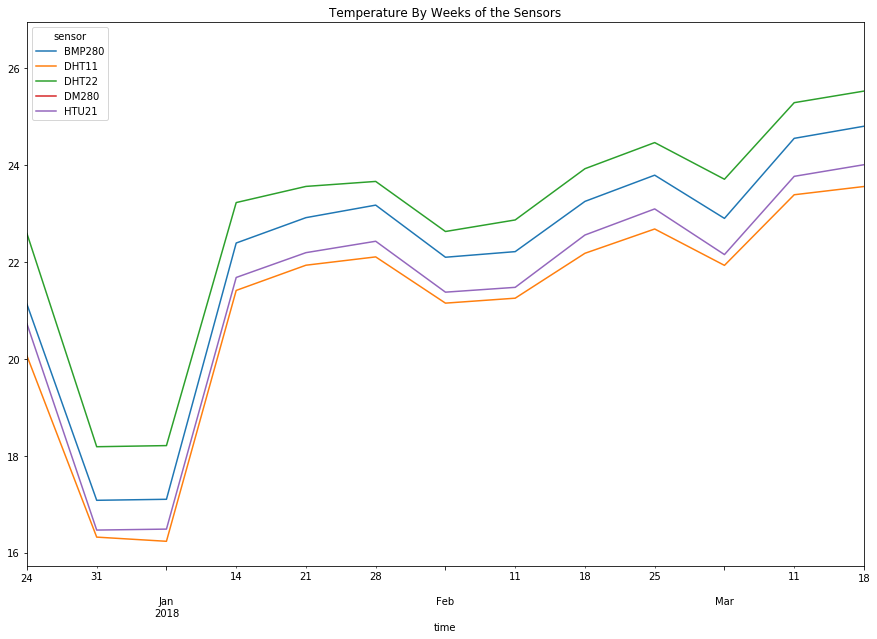

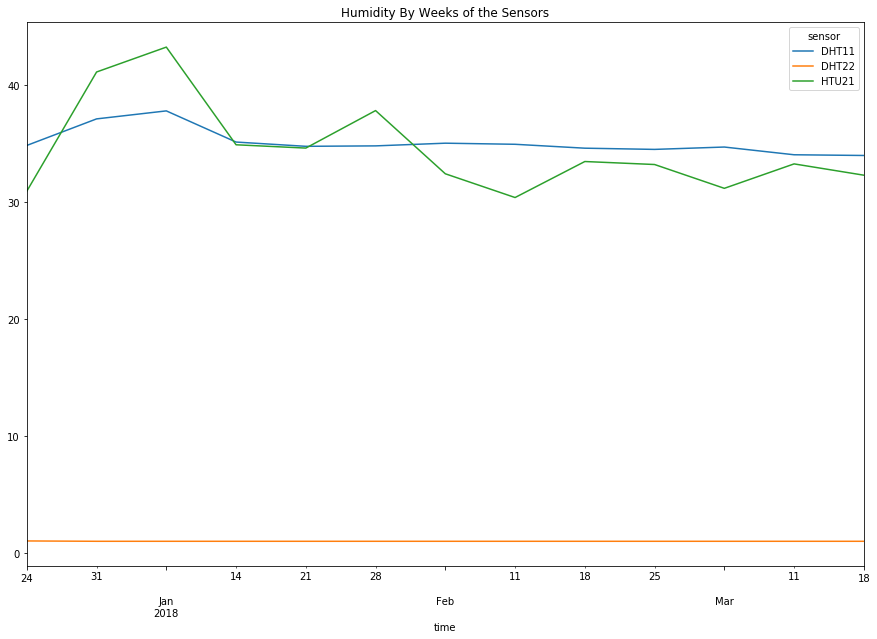

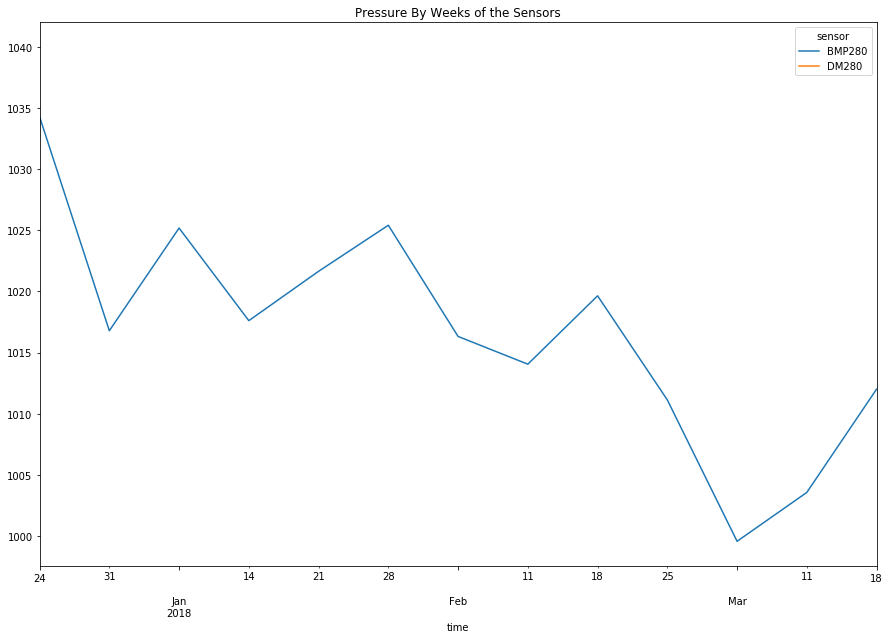

In [6]:
temperature_sensors=pd.concat([t_dht_11,t_dht_22,t_htu_21,t_bmp_280,t_dm_280])
temperature_sensors=temperature_sensors.pivot(columns='sensor',values="temperature")
temperature_sensors.plot(figsize=(15, 10),title="Temperature By Weeks of the Sensors")
humidity_sensors=pd.concat([h_dht_11,h_dht_22,h_htu_21])
humidity_sensors=humidity_sensors.pivot(columns='sensor',values="humidity")
humidity_sensors.plot(figsize=(15, 10),title="Humidity By Weeks of the Sensors")
pressure_sensors=pd.concat([p_bmp_280,p_dm_280])
pressure_sensors=pressure_sensors.pivot(columns='sensor',values="hPa")
pressure_sensors.plot(figsize=(15, 10),title="Pressure By Weeks of the Sensors")